In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD

from preprocess import get_mnist
# from preprocess import get_mvtec

In [2]:
class Args:

    num_epochs=150
    num_epochs_ae=150
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=32
    normal_class=1
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_mnist(args)
# data2 = get_mvtec(args)

deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 0, Loss: 132.211
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 1, Loss: 93.450
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 2, Loss: 65.631
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 3, Loss: 48.012
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 4, Loss: 36.704
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 5, Loss: 29.130
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 6, Loss: 23.838
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 7, Loss: 19.998
6742/6742: [===============================>] - ETA 0.0s
Pretraining Autoencoder... Epoch: 8, Loss: 17.122
6742/6742: [========================

In [3]:
deep_SVDD.train()

6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 0, Loss: 0.148
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 1, Loss: 0.054
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 2, Loss: 0.026
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 3, Loss: 0.016
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 4, Loss: 0.012
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 5, Loss: 0.009
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 6, Loss: 0.007
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 7, Loss: 0.006
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 8, Loss: 0.005
6742/6742: [===============================>] - ETA 0.0s
Training Deep SVDD... Epoch: 9, Lo

Testing...
encoded_data [[-0.56411105  0.13562946  0.33844256 ... -0.10416693  0.3538589
   0.10679128]
 [-0.5476935   0.12849642  0.32646558 ... -0.11379379  0.35437474
   0.15181479]
 [-0.58957815  0.12323317  0.3516273  ... -0.10763873  0.3867617
   0.15225472]
 ...
 [-0.582002    0.13635203  0.38150662 ... -0.09383529  0.32643026
   0.1205613 ]
 [-0.55872196  0.13848756  0.3669646  ... -0.09633232  0.36095932
   0.14963645]
 [-0.587817    0.13050094  0.36633855 ... -0.1         0.38464803
   0.12798926]]
encoded_data_2d [[  8.274953  27.637852]
 [ 65.040764  20.759674]
 [-54.815983  35.350243]
 ...
 [ 12.929324 -10.911588]
 [  5.302389 -55.61503 ]
 [-67.020676   2.961784]]
c [-67.020676   2.961784]


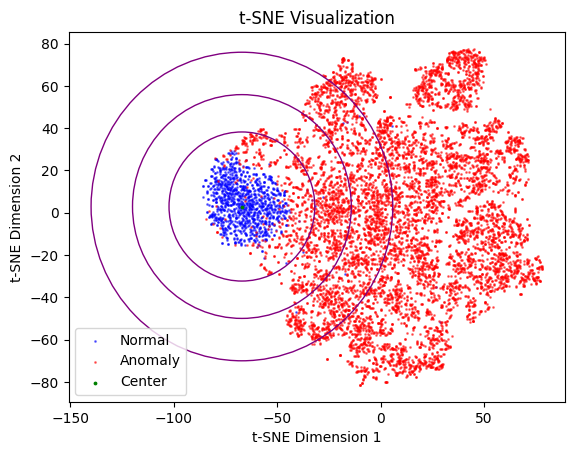

ROC AUC score: 99.65
Label: 1 Score: 0.019376371
Label: 1 Score: 0.067007676
Label: 1 Score: 0.007915076
Label: 1 Score: 0.03127166
Label: 1 Score: 0.02831694
Label: 1 Score: 0.06712803
Label: 1 Score: 0.01221848
Label: 1 Score: 0.0071647973
Label: 0 Score: 0.00020374742
Label: 0 Score: 0.00015287561
Label: 1 Score: 0.020083733
Label: 1 Score: 0.023994667
Label: 1 Score: 0.0046979273
Label: 1 Score: 0.05626577
Label: 1 Score: 0.018634299
Label: 1 Score: 0.0046711457
Label: 0 Score: 0.00029906965
Label: 1 Score: 0.049731888
Label: 1 Score: 0.016659498
Label: 1 Score: 0.04077503
Label: 1 Score: 0.03719954
Label: 1 Score: 0.009497009
Label: 0 Score: 0.00024350763
Label: 0 Score: 0.00046150846
Label: 1 Score: 0.004555505
Label: 1 Score: 0.10381905
Label: 1 Score: 0.006858691
Label: 1 Score: 0.0032274225
Label: 1 Score: 0.053104028
Label: 1 Score: 0.05404993
Label: 1 Score: 0.0031205532
Label: 1 Score: 0.013929208
Label: 0 Score: 0.00041256566
Label: 1 Score: 0.01388905
Label: 1 Score: 0.02

In [4]:
from test import eval

labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

# Print all labels and scores
for label, score in zip(labels, scores):
    print("Label:", label, "Score:", score)


Scores (Inliers): [0.00020375 0.00015288 0.00029907 ... 0.00020299 0.00162902 0.00016175]
Scores (Outliers): [0.01937637 0.06700768 0.00791508 ... 0.0273877  0.01659134 0.03344444]


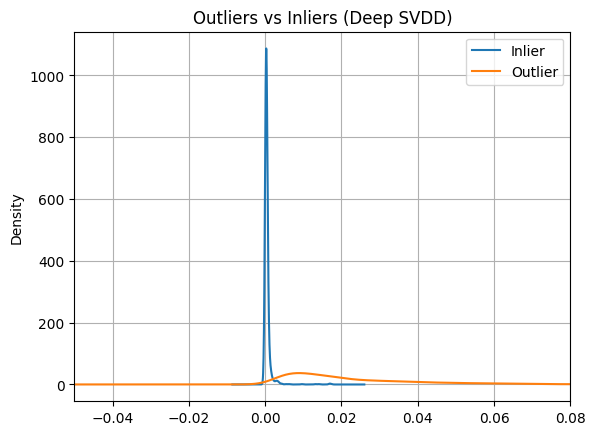

In [5]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]

# Print scores_in and scores_out
print("Scores (Inliers):", scores_in)
print("Scores (Outliers):", scores_out)


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()

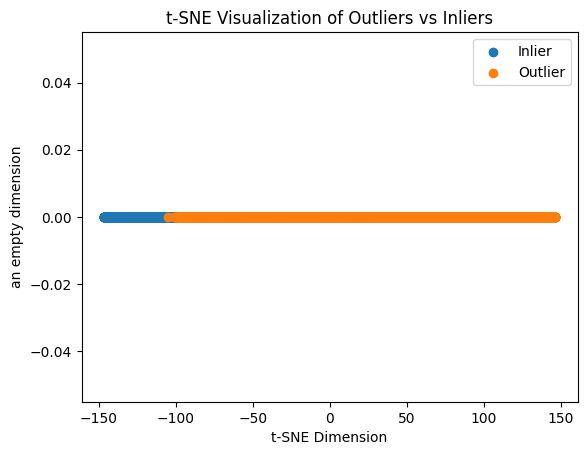

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 입력 배열을 2D로 재구성
scores_in_2d = scores_in.reshape(-1, 1)
scores_out_2d = scores_out.reshape(-1, 1)

# 재구성된 배열을 연결(concatenate)
data = np.concatenate((scores_in_2d, scores_out_2d), axis=0)
labels = np.concatenate((np.zeros(scores_in_2d.shape[0]), np.ones(scores_out_2d.shape[0])), axis=0)

# t-SNE 적용
tsne = TSNE(n_components=1, random_state=42)
embedded = tsne.fit_transform(data)

# Visualization
plt.scatter(embedded[labels == 0], np.zeros_like(embedded[labels == 0]), label="Inlier")
plt.scatter(embedded[labels == 1], np.zeros_like(embedded[labels == 1]), label="Outlier")
plt.xlabel("t-SNE Dimension")
plt.ylabel("an empty dimension")
plt.title("t-SNE Visualization of Outliers vs Inliers")
plt.legend()
plt.show()

# plt.scatter(embedded[labels == 0, 0], embedded[labels == 0, 1], label="Inlier")
# plt.scatter(embedded[labels == 1, 0], embedded[labels == 1, 1], label="Outlier")
# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")
# plt.title("t-SNE Visualization of Outliers vs Inliers")
# plt.legend()
# plt.show()